<a href="https://colab.research.google.com/github/Penpitcha0634/BSC_DPDM23/blob/main/Project2_Cluster_Analysis_%E0%B8%82%E0%B9%89%E0%B8%AD%E0%B8%A1%E0%B8%B9%E0%B8%A5%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B9%80%E0%B8%95%E0%B8%B4%E0%B8%A1%E0%B9%81%E0%B8%A5%E0%B9%89%E0%B8%A7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/seminar & project /Project/project2/project2 มลพิษทางอากาศและปัจจัยที่ส่งผลต่อมลพิษทางอากาศ เติมแล้ว.xlsx'# ระบุเส้นทางของไฟล์ Excel
sheet_name = 'รวมตัวแปรที่เติมแล้ว'# ระบุชื่อ Sheet ที่ต้องการ
#อ่านข้อมูลไฟล์จาก Excel
Air_pollution = pd.read_excel(file_path, sheet_name=sheet_name)
# แสดงข้อมูล
print(Air_pollution.head())

       จังหวัด      ZSO2          ZNO2           ZCO           ZO3     ZPM10  \
0       กระบี่ -0.689794 -1.003260e+00 -2.300000e-07 -2.689200e-01 -3.836360   
1    กาญจนบุรี -0.921480 -7.769000e-01 -1.092340e+00  1.992160e+00  0.644520   
2    กาฬสินธุ์ -0.000003 -2.100000e-07 -2.300000e-07 -3.800000e-07  0.000001   
3  \tกำแพงเพชร -0.216350 -3.242000e-01  9.964000e-02 -7.982100e-01 -1.104120   
4    \tขอนแก่น  3.641037  1.486574e+00  1.069260e-01 -5.802600e-01  1.409550   

         ZPM2.5  Zจำนวนโรงงาน  Zปริมาณกากของเสีย  Zจำนวนครัวเรือน  ...  \
0 -1.732160e+00      -0.54747           -0.53700         -0.58704  ...   
1 -8.953200e-01       0.06925            1.20726          0.14027  ...   
2 -9.300000e-18      -0.03600            2.06492         -0.03049  ...   
3 -1.352970e+00      -0.37718           -0.31658         -0.20052  ...   
4  2.079380e+00       0.86832           -0.19768          1.56115  ...   

    Zฤดูฝน  Zฤดูหนาว  Zปริมาณการใช้ไฟฟ้าครัว  Zปริมาณการใช้ไฟฟ้ากิจก  \
0 

In [5]:
# ตรวจสอบชื่อคอลัมน์
print(Air_pollution.columns)

Index(['จังหวัด', 'ZSO2', 'ZNO2', 'ZCO', 'ZO3', 'ZPM10', 'ZPM2.5',
       'Zจำนวนโรงงาน', 'Zปริมาณกากของเสีย', 'Zจำนวนครัวเรือน', 'Zอุณหภูมิ',
       'Zฤดูร้อน', 'Zฤดูฝน', 'Zฤดูหนาว', 'Zปริมาณการใช้ไฟฟ้าครัว',
       'Zปริมาณการใช้ไฟฟ้ากิจก', 'Zปริมาณน้ำมันที่ใช้กับ',
       'Zจำนวนรถตามกฎหมายรถยนต', 'Zจำนวนรถตามกฎหมายขนส่ง',
       'Zปริมาณขยะมูลฝอยที่เกิ', 'Zปริมาณขยะมูลฝอยตกค้าง',
       'Zปริมาณพื้นที่สีเขียว'],
      dtype='object')


In [6]:
X = Air_pollution[['ZSO2', 'ZNO2', 'ZCO', 'ZO3', 'ZPM10', 'ZPM2.5',
       'Zจำนวนโรงงาน', 'Zปริมาณกากของเสีย', 'Zจำนวนครัวเรือน', 'Zอุณหภูมิ',
       'Zฤดูร้อน', 'Zฤดูฝน', 'Zฤดูหนาว', 'Zปริมาณการใช้ไฟฟ้าครัว',
       'Zปริมาณการใช้ไฟฟ้ากิจก', 'Zปริมาณน้ำมันที่ใช้กับ',
       'Zจำนวนรถตามกฎหมายรถยนต', 'Zจำนวนรถตามกฎหมายขนส่ง',
       'Zปริมาณขยะมูลฝอยที่เกิ', 'Zปริมาณขยะมูลฝอยตกค้าง',
       'Zปริมาณพื้นที่สีเขียว']].values

In [7]:
# การจัดกลุ่มแบบลำดับชั้น (Hierarchical Clustering)
# สร้าง linkage matrix
linkage_matrix = linkage(X, method='single')  # ใช้ Single Linkage


In [8]:
# กำหนดจำนวนกลุ่ม (สมมุติ 2 กลุ่ม)
n_clusters = 2
clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

In [9]:
# คำนวณค่า Silhouette
silhouette_vals = silhouette_samples(X, clusters)
silhouette_avg = silhouette_score(X, clusters)

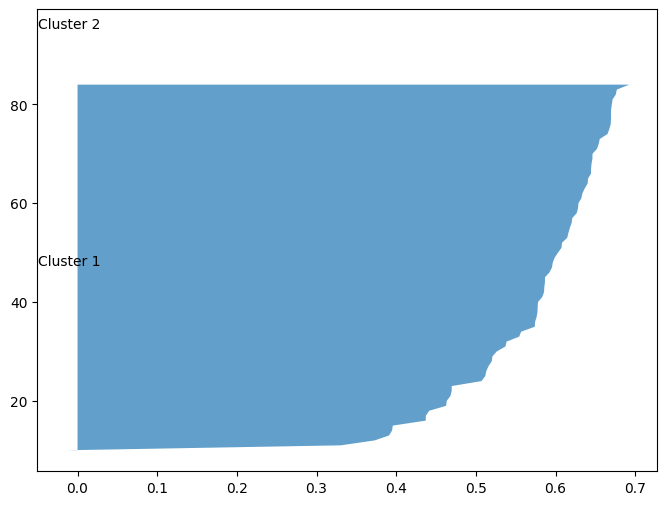

In [10]:
# สร้างกราฟ Silhouette
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(1, n_clusters + 1):
    cluster_silhouette_vals = silhouette_vals[clusters == i]
    cluster_silhouette_vals.sort()
    y_upper = y_lower + len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), f"Cluster {i}")
    y_lower = y_upper + 10

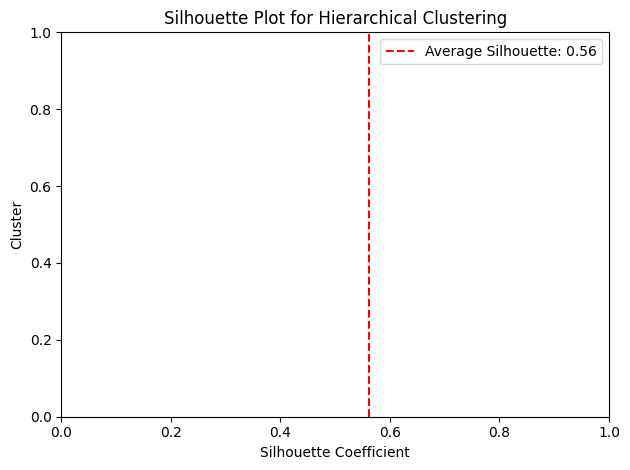

In [11]:
# เส้นค่าเฉลี่ย Silhouette
plt.axvline(silhouette_avg, color="red", linestyle="--", label=f"Average Silhouette: {silhouette_avg:.2f}")
plt.title("Silhouette Plot for Hierarchical Clustering")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.legend()
plt.tight_layout()
plt.show()